In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from datagen import *
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

NUM_ROWS = 20000

In [4]:
dframe = pd.DataFrame()
dframe = datagen(NUM_ROWS)

In [5]:
dframe

,studentIDs,gender,age,teacher_cred,class_size,disability,accomadation,gpadifference
0,20464,Female,15,PhD,29,Auditory Disability,Breakout Corner,0.980187
1,16706,Male,17,Bachelor's,24,Speaking Disability,Use of Calculator on Tests,1.596596
2,45204,Female,18,Associate's,38,Down Syndrome,Text to Speech Devices,-2.622191
3,15227,Female,10,PhD,21,Dyslexia,Tutoring Sessions,2.122146
4,16650,Female,8,Bachelor's,21,Low Emotional Intelligence,Breakout Corner,2.231090
...,...,...,...,...,...,...,...,...
19995,49487,Female,7,Associate's,37,Developmentally Delayed,Isolated Workstation,-1.885580
19996,23749,Male,17,Bachelor's,22,Down Syndrome,Use of Calculator on Tests,1.393196
19997,12156,Female,13,Bachelor's,35,Speaking Disability,Bigger Print Materials,-2.050937
19998,34953,Female,8,Associate's,25,ADHD,Special Education Classroom,-0.811397


In [6]:
x = dframe.iloc[:, 1:-1].values
y = dframe.iloc[:, -1].values

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 0] = le.fit_transform(x[:,0])
print(x)

[[0 15 'PhD' 29 'Auditory Disability' 'Breakout Corner']
 [1 17 "Bachelor's" 24 'Speaking Disability' 'Use of Calculator on Tests']
 [0 18 "Associate's" 38 'Down Syndrome' 'Text to Speech Devices']
 ...
 [0 13 "Bachelor's" 35 'Speaking Disability' 'Bigger Print Materials']
 [0 8 "Associate's" 25 'ADHD' 'Special Education Classroom']
 [1 11 "Master's" 34 'Auditory Disability' 'Use of Calculator on Tests']]


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough')
x = np.array(ct2.fit_transform(x))
ct3 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [18])], remainder='passthrough')
x = np.array(ct3.fit_transform(x))

In [9]:
from sklearn.preprocessing import MinMaxScaler
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(x)
scalarY.fit(y.reshape(NUM_ROWS,1))
x = scalarX.transform(x)
y = scalarY.transform(y.reshape(NUM_ROWS,1))

In [29]:
# Coulums 0-3 are highest degree
# colums 4 is gender
# colum 5 is normalized age
# colum 6 is normalized class sized

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=7687)

In [31]:
# container for adding layers to nuerual net
TARS = tf.keras.models.Sequential()

In [32]:
TARS.add(tf.keras.layers.Dense(input_dim = 29 ,units = 50, activation='relu'))
TARS.add(tf.keras.layers.Dense(units=30, activation='relu'))
TARS.add(tf.keras.layers.Dense(units=50, activation='relu'))
TARS.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [33]:
TARS.compile(optimizer="adam", loss="mean_squared_error", metrics=['mse', 'accuracy'])

In [34]:

TARS.fit(x_train, y_train, batch_size=32, epochs=200)

500/500 [==============================] - 1s 2ms/step - loss: 0.0012 - mse: 0.0012 - accuracy: 0.0045
Epoch 129/200
500/500 [==============================] - 1s 2ms/step - loss: 0.0012 - mse: 0.0012 - accuracy: 0.0064
Epoch 130/200
500/500 [==============================] - 1s 2ms/step - loss: 0.0012 - mse: 0.0012 - accuracy: 0.0059
Epoch 131/200
500/500 [==============================] - 1s 2ms/step - loss: 0.0012 - mse: 0.0012 - accuracy: 0.0062
Epoch 132/200
500/500 [==============================] - 1s 2ms/step - loss: 0.0012 - mse: 0.0012 - accuracy: 0.0057
Epoch 133/200
500/500 [==============================] - 1s 2ms/step - loss: 0.0012 - mse: 0.0012 - accuracy: 0.0056
Epoch 134/200
500/500 [==============================] - 1s 2ms/step - loss: 0.0012 - mse: 0.0012 - accuracy: 0.0055
Epoch 135/200
500/500 [==============================] - 1s 2ms/step - loss: 0.0012 - mse: 0.0012 - accuracy: 0.0060
Epoch 136/200
500/500 [==============================] - 1s 2ms/step - loss: 0



*   List item
*   List item



In [35]:
TARS.save("weights.h5")

In [36]:
TARS.evaluate(x_test, y_test)

125/125 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - accuracy: 0.0052


[0.0017402931116521358, 0.0017402931116521358, 0.005249999929219484]

In [37]:
x_test[0:1]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.58333333, 0.29268293]])

In [38]:
# give me a student and lets try some accomedation
# take in a normal row input
# changing accomedation
# class size 
# teacher_cre

In [ ]:
scalarY.inverse_transform(TARS.predict(np.array([[0,0,0,1,1,0.5,0.5]])))

In [ ]:
TARS.predict(np.array([[0,1,0,0,1,0.5,0.5]]))

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)
Mohan to Everyone (12:01 PM)
grid.fit(X_train, y_train)
print(grid.best_params_)

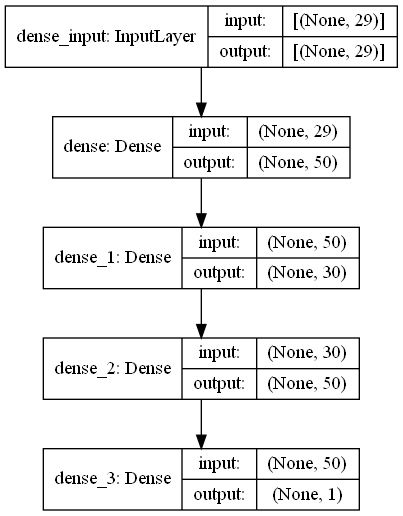

In [2]:
TARS = tf.keras.models.Sequential()
TARS.add(tf.keras.layers.Dense(input_dim = 29 ,units = 50, activation='relu'))
TARS.add(tf.keras.layers.Dense(units=30, activation='relu'))
TARS.add(tf.keras.layers.Dense(units=50, activation='relu'))
TARS.add(tf.keras.layers.Dense(units=1, activation='linear'))
TARS.compile(optimizer="adam", loss="mean_squared_error", metrics=['mse', 'accuracy'])
TARS.load_weights('weights.h5')
from keras.utils.vis_utils import plot_model
plot_model(TARS, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
def predict(sample_student):
    maxdif = -4
    bestaccom = ""
    accomodation_list = ["Materials in Braille", "Text to Speech Devices", "Breakout Corner", "Use of Toy in Class", "Bigger Print Materials", "Isolated Workstation", "Tutoring Sessions", "Book Buddy", "Use of Calculator on Tests", "AAC Devices", "Special Education Classroom"]
    gpadiffs = []
    for i in accomodation_list:
        temparray= [[]] 
        temparray[0] = np.append(sample_student, i)
        temparray = np.array(temparray)
        temparray[:, 0] = le.transform(temparray[:,0])
        temparray = np.array(ct.transform(temparray))
        temparray = np.array(ct2.transform(temparray))
        temparray = np.array(ct3.transform(temparray))
        temparray = scalarX.transform(temparray)
        gpadiffs.append(scalarY.inverse_transform(TARS.predict(np.array(temparray)))[0][0])
        if (scalarY.inverse_transform(TARS.predict(np.array(temparray))) > maxdif):
            maxdif = scalarY.inverse_transform(TARS.predict(np.array(temparray)))
            bestaccom = i
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_axes([0,0,1,1])
    plt.xticks(rotation=45)
    ax.bar(accomodation_list, gpadiffs)
    return(bestaccom + " is the predicted best accomadation.")

'Isolated Workstation is the predicted best accomadation.'

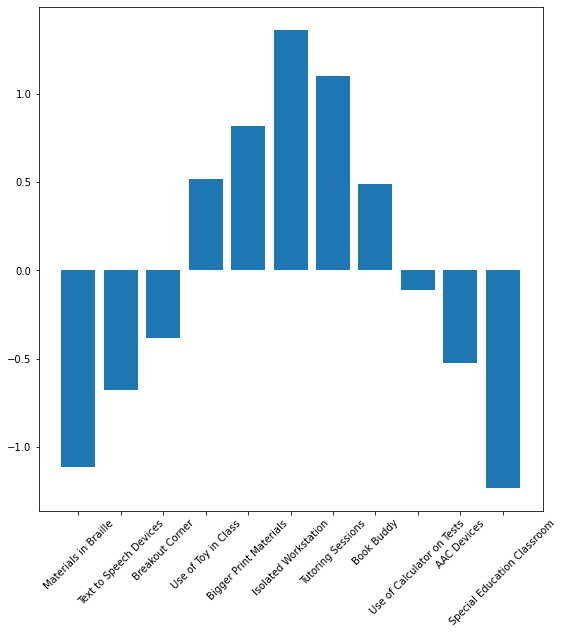

In [19]:
#predicting which accommodation is most effective given a student
#input: gender, age, teacher_cred, class size, disability
predict(np.array([["Female", "15", "Bachelor's", "25", "ADHD"]]))

In [ ]:

#TARS = tf.keras.models.load_model('weights.h5')


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]} 
grid = GridSearchCV(TARS, param_grid, verbose=3)

In [ ]:
# TARS.layers[1].get_weights()

GridSearch
Figure out which columns are the most impactful
transform outputs back
fix environment

In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
# import eli5
# from eli5.sklearn import PermutationImportance

In [ ]:
# my_model = KerasRegressor(build, epochs=100, batch_size=200)    
# my_model.fit(x,y)

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

# kfold = KFold(n_splits=10)
# results = cross_val_score(my_model, x, y, cv=kfold)


In [ ]:
# TARS

In [ ]:
# import shap

In [ ]:
# shap.initjs()

In [ ]:
# explainer = shap.TreeExplainer(TARS)
# shap_values = explainer.shap_values(x)

In [ ]:
# # permutation feature importance with knn for classification
# from sklearn.datasets import make_classification
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.inspection import permutation_importance
# from matplotlib import pyplot
# # define dataset
# # define the model
# # fit the model
# # perform permutation importance
# results = permutation_importance(TARS, x, y, scoring='accuracy')
# # get importance
# importance = results.importances_mean
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

